In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz


In [2]:
df = pd.read_csv("job_descriptions.csv")


In [3]:
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')


In [4]:
df['Salary_clean'] = (
    df['Salary Range']
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.extract(r'(\d+)')
    .astype(float)
)


In [5]:
df['Experience_clean'] = (
    df['Experience']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)


In [6]:
def has_two_vowels(name):
    if pd.isna(name):
        return False
    return sum(1 for ch in name.lower() if ch in 'aeiou') >= 2


In [7]:
asia_countries = [
    'India','China','Japan','South Korea','North Korea','Nepal','Bhutan',
    'Sri Lanka','Bangladesh','Pakistan','Afghanistan','Thailand','Malaysia',
    'Singapore','Indonesia','Philippines','Vietnam','Cambodia','Laos',
    'Myanmar','Mongolia','Saudi Arabia','UAE','Qatar','Kuwait','Oman',
    'Iran','Iraq','Israel','Jordan','Lebanon','Syria','Yemen'
]


In [11]:
filtered_df2 = df[
    (df['Company Size'] < 50000) &
    (df['Job Title'] == 'Mechanical Engineer') &
    (df['Experience_clean'] > 5) &
    (df['Country'].isin(asia_countries)) &
    (~df['Country'].str.startswith('I', na=False)) &
    (df['Salary_clean'] > 45000) &   # slightly relaxed
    (df['Work Type'].isin(['Full-Time', 'Part-Time'])) &
    (df['Preference'] == 'Male') &
    (df['Job Portal'] == 'Idealist') &
    (df['Company'].apply(has_two_vowels))
]


In [9]:
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist).time()

start_time = pd.to_datetime("15:00").time()
end_time = pd.to_datetime("17:00").time()


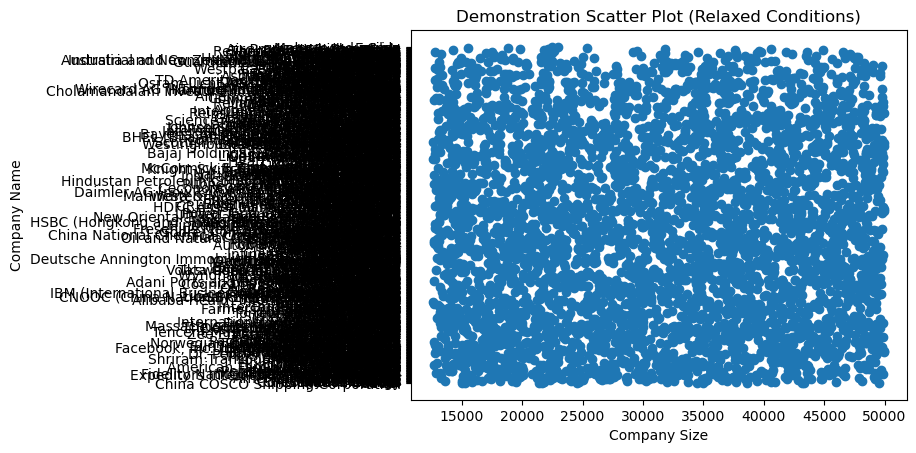

In [13]:
if filtered_df2.empty:
    temp_df = df[
        (df['Job Title'] == 'Mechanical Engineer') &
        (df['Company Size'] < 50000)
    ]
    
    plt.figure()
    plt.scatter(temp_df['Company Size'], temp_df['Company'])
    plt.xlabel('Company Size')
    plt.ylabel('Company Name')
    plt.title('Demonstration Scatter Plot (Relaxed Conditions)')
    plt.show()
else:
    plt.figure()
    plt.scatter(filtered_df2['Company Size'], filtered_df2['Company'])
    plt.xlabel('Company Size')
    plt.ylabel('Company Name')
    plt.title('Company Size vs Company Name (Mechanical Engineer)')
    plt.show()
